# Liver disease Classification using a few naive bayes and logistic regression algorithms

In [1]:
# Import the required libraries for data frame loading, analysis, pre-processing, visualisation & modeling etc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the input dataset present in "liver_disease_1.csv" using the read_csv method of the pandas dataframe
dataset = pd.read_csv("liver_disease_1.csv")

In [3]:
# lets perform some exploratory data analysis...
# inspect the first 5 rows using the head method of the dataframe object
dataset.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


In [4]:
# inspect the last 5 rows using the tail method of the dataframe object
dataset.tail()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,No
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,Yes
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,Yes
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,Yes
582,38,1.0,0.3,216,21,24,7.3,4.4,1.50,No


In [5]:
# inspect how many rows x columns are there in the input data, using the shape variable of the  dataframe
dataset.shape

(583, 10)

In [6]:
# Lets check using the info method to see nature of columns, any indication of NULL/NaN/missing values in any columns! 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Total_Bilirubin             583 non-null    float64
 2   Direct_Bilirubin            583 non-null    float64
 3   Alkaline_Phosphotase        583 non-null    int64  
 4   Alamine_Aminotransferase    583 non-null    int64  
 5   Aspartate_Aminotransferase  583 non-null    int64  
 6   Total_Protiens              583 non-null    float64
 7   Albumin                     583 non-null    float64
 8   Albumin_and_Globulin_Ratio  579 non-null    float64
 9   Dataset                     583 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 45.7+ KB


In [7]:
# Only the last column Dataset, contains non-numerical/Object values
# Let's use the LabelEncoder, so that we have 100% numerical in the columns
label_encoder = LabelEncoder()
dataset['Dataset'] = label_encoder.fit_transform(dataset['Dataset'])

In [8]:
# Lets recheck using the info method to see nature of columns, any indication of NULL/NaN/missing values in any columns! 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Total_Bilirubin             583 non-null    float64
 2   Direct_Bilirubin            583 non-null    float64
 3   Alkaline_Phosphotase        583 non-null    int64  
 4   Alamine_Aminotransferase    583 non-null    int64  
 5   Aspartate_Aminotransferase  583 non-null    int64  
 6   Total_Protiens              583 non-null    float64
 7   Albumin                     583 non-null    float64
 8   Albumin_and_Globulin_Ratio  579 non-null    float64
 9   Dataset                     583 non-null    int32  
dtypes: float64(5), int32(1), int64(4)
memory usage: 43.4 KB


In [9]:
# we see all columns are numerical now!
# But the column Albumin_and_Globulin_Ratio seems to have some Nan/NULL/missing values! 
# Let's remove those instances, as they are few 
for (columnName, columnData) in dataset.items(): 
    dataset = dataset.dropna(how='any', subset=[columnName])

In [10]:
# Lets recheck using the info method to see nature of columns, any indication of NULL/NaN/missing values in any columns! 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 579 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         579 non-null    int64  
 1   Total_Bilirubin             579 non-null    float64
 2   Direct_Bilirubin            579 non-null    float64
 3   Alkaline_Phosphotase        579 non-null    int64  
 4   Alamine_Aminotransferase    579 non-null    int64  
 5   Aspartate_Aminotransferase  579 non-null    int64  
 6   Total_Protiens              579 non-null    float64
 7   Albumin                     579 non-null    float64
 8   Albumin_and_Globulin_Ratio  579 non-null    float64
 9   Dataset                     579 non-null    int32  
dtypes: float64(5), int32(1), int64(4)
memory usage: 47.5 KB


In [11]:
# lets see some statistics about the cleaned-up data now
dataset.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,0.715026
std,16.221786,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


### Let's perform some data visualisation to understand relationship between input and output variables, corrleation between input variables etc

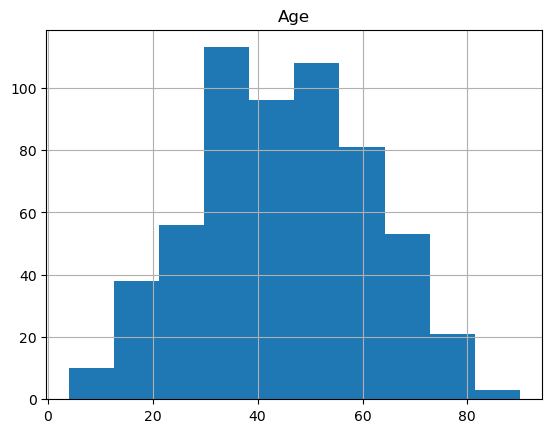

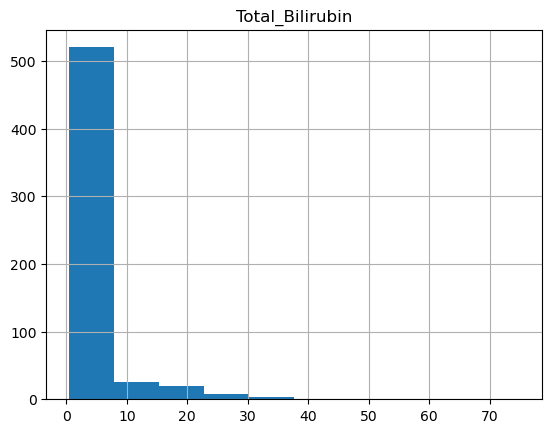

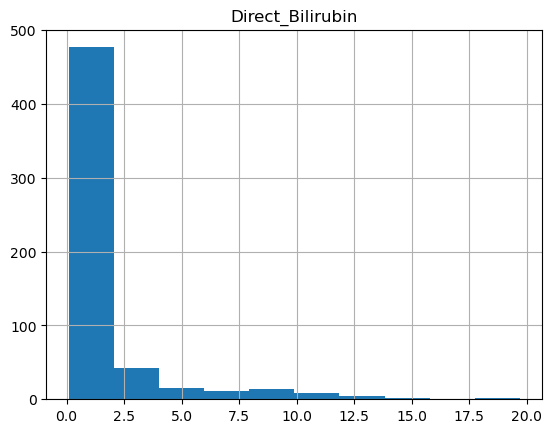

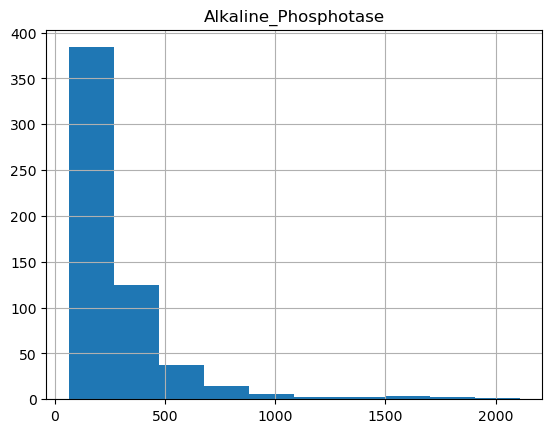

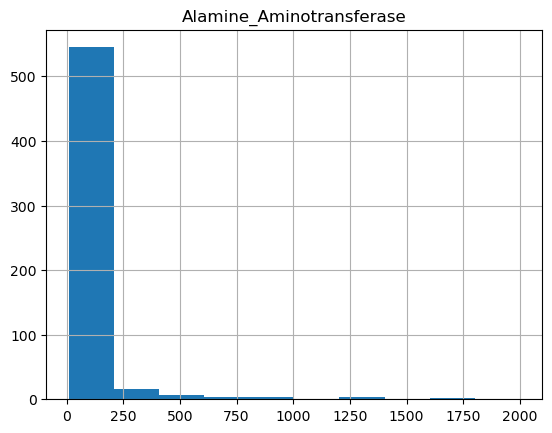

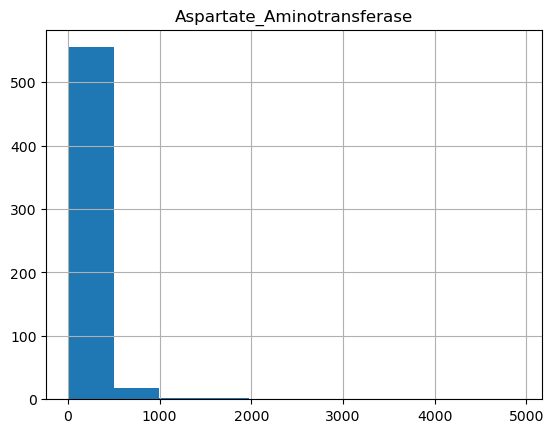

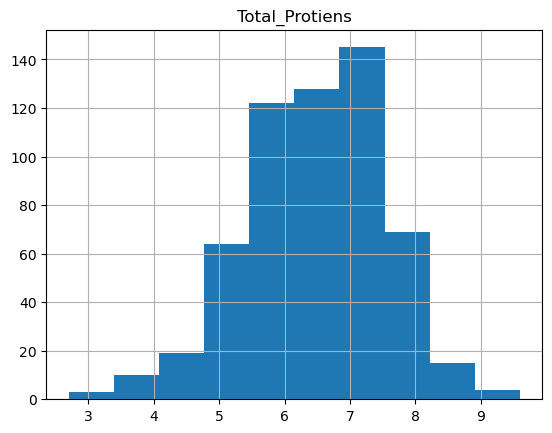

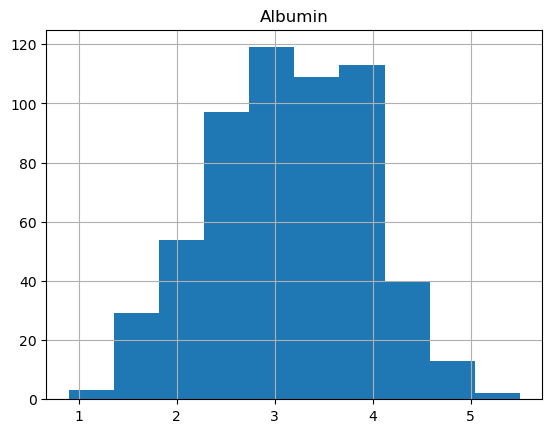

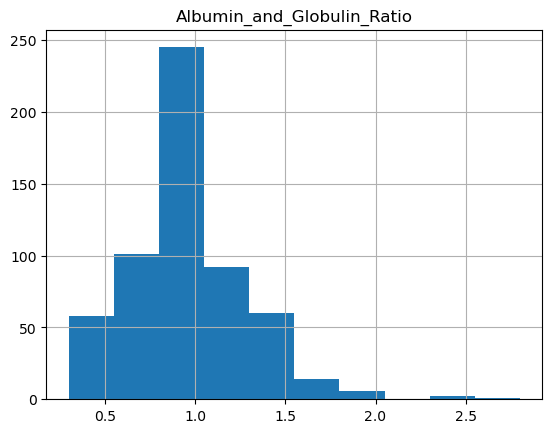

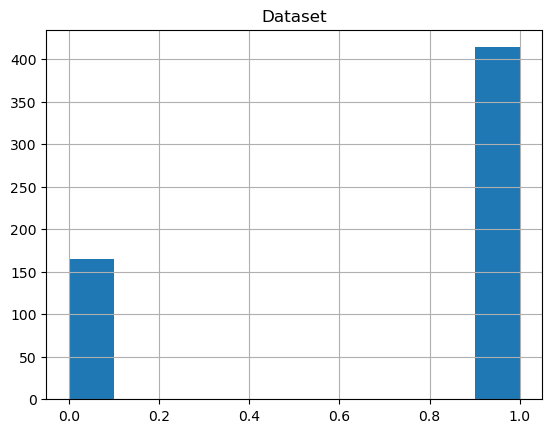

In [12]:
# lets see the histograms of all the features and output variables
for (columnName, columnData) in dataset.items():
    dataset.hist(columnName)
    plt.show()

C:\Users\sudhe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


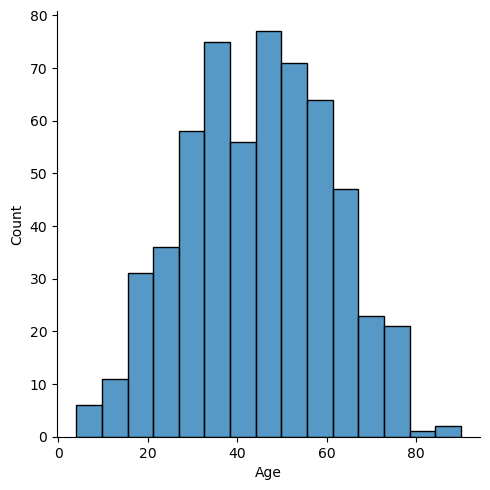

C:\Users\sudhe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


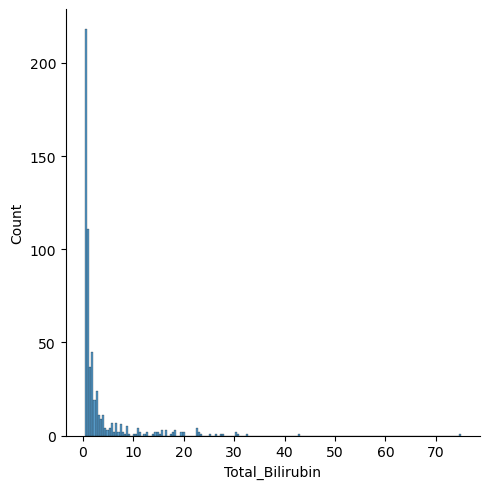

C:\Users\sudhe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


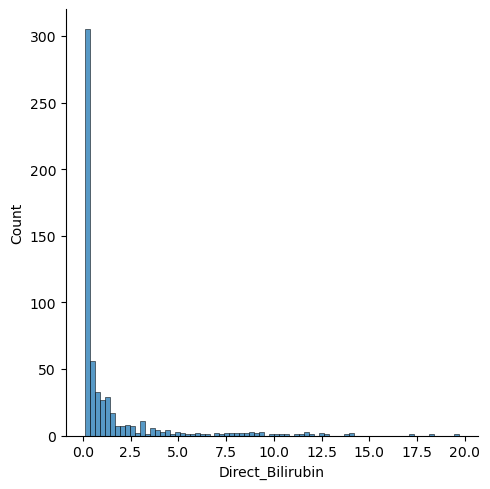

C:\Users\sudhe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


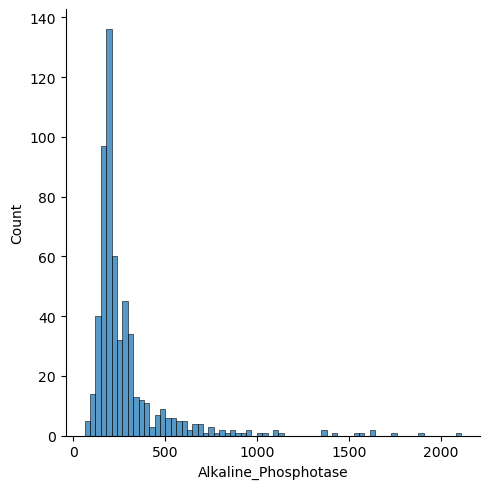

C:\Users\sudhe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


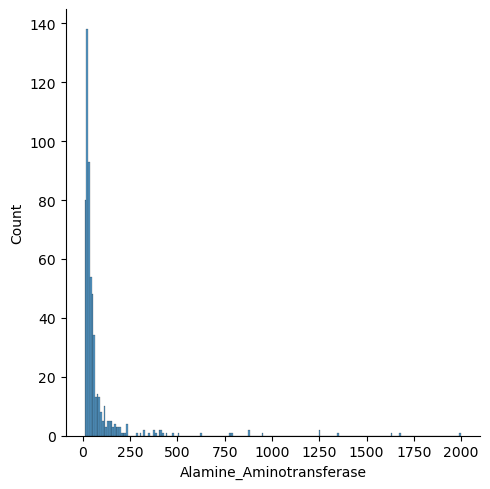

C:\Users\sudhe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


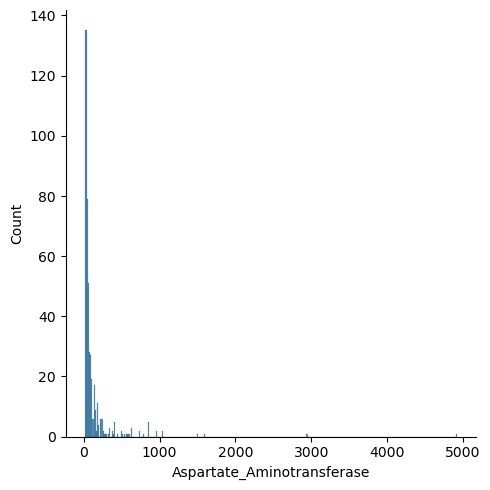

C:\Users\sudhe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


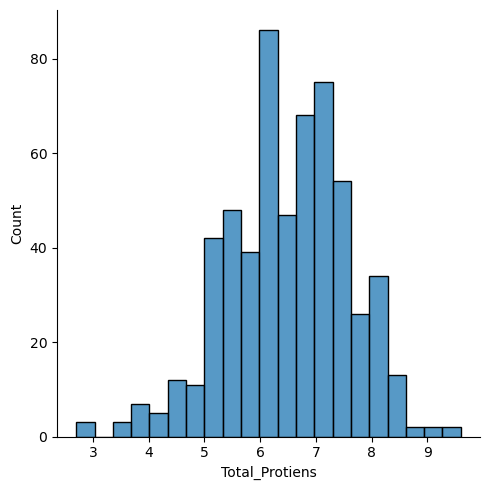

C:\Users\sudhe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


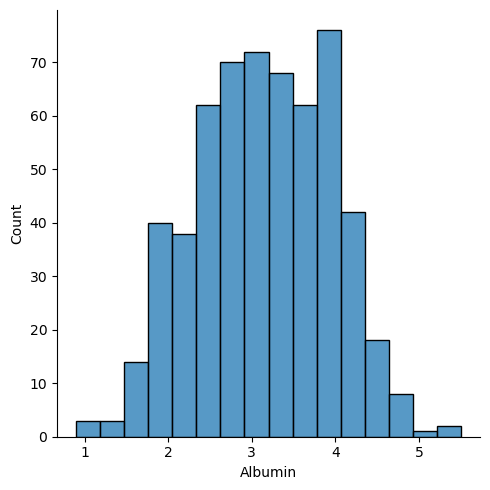

C:\Users\sudhe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


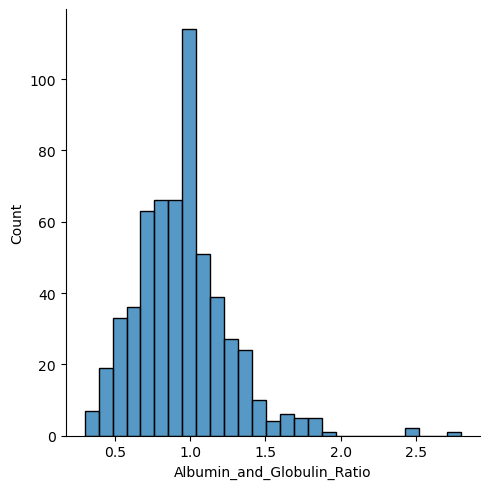

C:\Users\sudhe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


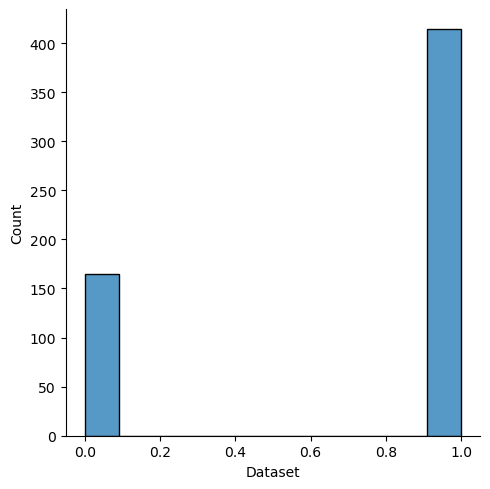

In [13]:
# lets see the histograms of all the features and output variables
for (columnName, columnData) in dataset.items():
    sns.displot(dataset[columnName])
    plt.show()

In [ ]:
# clearly some scaling is needed for some of the features
# next lets see some stacked bar plots
dataset.groupby(['Age','Dataset']).size().unstack().plot(kind='bar', stacked=True)
dataset.groupby(['Total_Bilirubin','Dataset']).size().unstack().plot(kind='bar', stacked=True)
dataset.groupby(['Direct_Bilirubin','Dataset']).size().unstack().plot(kind='bar', stacked=True)
dataset.groupby(['Alkaline_Phosphotase','Dataset']).size().unstack().plot(kind='bar', stacked=True)
dataset.groupby(['Alamine_Aminotransferase','Dataset']).size().unstack().plot(kind='bar', stacked=True)
dataset.groupby(['Aspartate_Aminotransferase','Dataset']).size().unstack().plot(kind='bar', stacked=True)
dataset.groupby(['Total_Protiens','Dataset']).size().unstack().plot(kind='bar', stacked=True)
dataset.groupby(['Albumin','Dataset']).size().unstack().plot(kind='bar', stacked=True)
dataset.groupby(['Albumin_and_Globulin_Ratio','Dataset']).size().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='Albumin_and_Globulin_Ratio'>

In [ ]:
# from the above visualisations we clearly see relationship of liver disease age, proteins and other features given
# lets check if there are outliers in the data using box plots
for (columnName, columnData) in dataset.items(): 
    #dataset.boxplot(column = [columnName])
    sns.boxplot(x=dataset[columnName])
    plt.show()

In [ ]:
# we clearly see outliers in all columns except Albumin and Dataset and hence need to remove them
# Let's define a method that will get the outliers for getting threshold value from IQR
def get_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for (columnName, columnData) in dataset.items():
    if ((columnName != 'Albumin') and ( columnName != 'Dataset' )):
        #invoke the above remove_outlier method for all columns, except Albumin and Dataset
        lowerStatus, higherStatus = get_outlier(dataset[columnName])

        # we will now replace data points having the higher values than upper quartile with upper quartile value
        dataset[columnName] = np.where(dataset[columnName] > higherStatus, higherStatus, dataset[columnName])

        # we will now replace the data points having the lower values than lower quartile with lower quartile value
        dataset[columnName] = np.where(dataset[columnName] < lowerStatus, lowerStatus, dataset[columnName])

In [ ]:
dataset.to_csv("liver_disease_1_output.csv", index=False)

In [ ]:
# lets check if there are any more outliers 
for (columnName, columnData) in dataset.items(): 
    sns.boxplot(x=dataset[columnName])
    plt.show()

In [ ]:
# We see that there are no more outliers! 
# Now, lets see heat map for correlation between features and outputs
corrmat = dataset.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="hot") 

In [ ]:
# From the above correlation matrix we see that the following feature pairs are highly correlated 
# so lets eliminate of the items in each pair (as one of them is redundant)
# 1) Total_Bilirubin & Direct_Bilirubin
# 2) Alamine_Aminotransferase & Aspartate_Aminotransferase
# 3) Total_Protiens & Albumin 
# 4) Albumin & Albumin_and_Globulin_Ratio
dataset.drop(['Direct_Bilirubin'], axis=1, inplace = True)
dataset.drop(['Aspartate_Aminotransferase'], axis=1, inplace = True)
dataset.drop(['Total_Protiens'], axis=1, inplace = True)
dataset.drop(['Albumin_and_Globulin_Ratio'], axis=1, inplace = True)

In [ ]:
dataset.shape

In [ ]:
# lets see heat map for correlation between features and outputs
corrmat = dataset.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="hot") 

In [ ]:
# Now that all exploratory data analysis, clean up is completed, the data is ready for modeling etc
# let's split features & labels
rows = dataset.shape[0]
cols = dataset.shape[1]
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, cols-1].values

# Lets split training and testing data
# We will also stratefy the samples for consistency, to counter input data imbalance 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=43, stratify=y)

# Let's scale the data 
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Now, Let's classify using a few types of Naive bayes classifiers

In [ ]:
# Create the Gaussian NB classifier
gnb = GaussianNB()

# Train the model, using training data set and predict on the test data
y_predict = gnb.fit(X_train, y_train).predict(X_test)

# display accuracy score metric
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test, y_predict))

In [ ]:
# lets also try Complement NB classifier
cnb = ComplementNB()

# Train the model, using training data set and predict on the test data
y_predict = cnb.fit(X_train, y_train).predict(X_test)

# display accuracy score metric
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test, y_predict))

### Now, lets classify using Logistic Regression

In [ ]:
# create the model
model = LogisticRegression(random_state=42)

# Train the model, using training data set
model.fit(X_train, y_train)

# predict using the model
y_predict = model.predict(X_test)

# display accuracy score metric
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test, y_predict))

### Accuracy and Inferences from the above models 

In [ ]:
# We can see from the above results that:
    # The Gaussian Naive Bayes classifier has classified correctly with accuracy of ~65%
    # The Complement Naive Bayes classifier has classified correctly with accuracy of ~62.5%
    # The LogisticRegression classifier has classified correctly with accuracy of ~68%
# For the given datatset, the Naive Bayes classifiers marginally performs lesser than the LogisticRegression!